<a href="https://colab.research.google.com/github/Tom-Lennox/Kaggle/blob/master/HousePrices_c01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# title

In [0]:
# kaggle APIセット
!pip install kaggle

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
# 「Download 100%.」と表示で成功。

# [kaggle.json]を持参する。
from google.colab import drive
drive.mount('/content/drive')

# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
!kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

Download 100%.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, s

In [0]:
# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# リスト見たい場合
# !kaggle datasets list

# train, test等ダウンロード
! kaggle competitions download house-prices-advanced-regression-techniques -p house-prices

# ダウンロードしたらここに入る大体。
!ls /content/house-prices

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.8MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.5MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.9MB/s]
data_description.txt  sample_submission.csv  test.csv  train.csv


The size of train is : (1460, 82)
The size of test is : (1459, 82)
歪度: 1.882876
尖度: 6.536282


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0, 0.5, 'SalePrice')

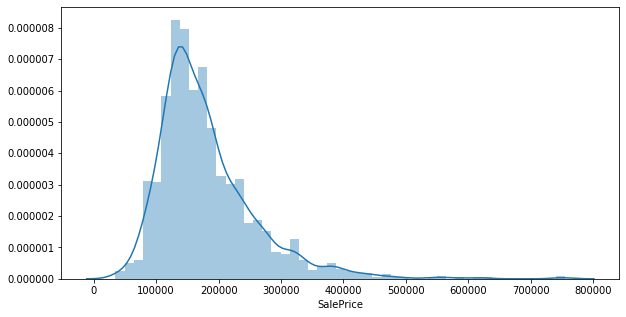

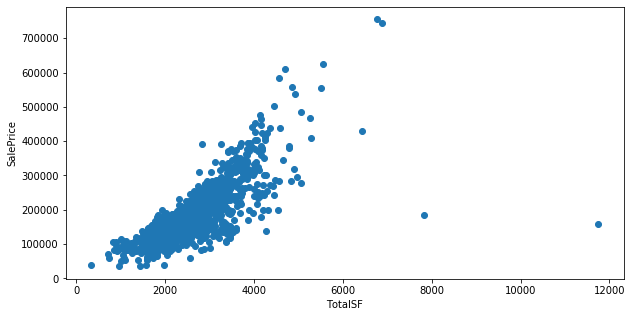

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# とりあえずファイルを読み込む
train = pd.read_csv("/content/house-prices/train.csv")
test = pd.read_csv("/content/house-prices/test.csv")

# 
# 配列の大きさを確認したい。
train['WhatIsData'] = 'Train'
test['WhatIsData'] = 'Test'
test['SalePrice'] = 9999999999
alldata = pd.concat([train,test],axis=0).reset_index(drop=True)
print('The size of train is : ' + str(train.shape))
print('The size of test is : ' + str(test.shape))
# 

train["SalePrice"].describe()
# mean, 50%等見て正規分布か確認。
# 下記で良いのでは？

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# .
# グラフ描画

plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
# 

# .
# 歪度と尖度を計算
print("歪度: %f" % train['SalePrice'].skew())
print("尖度: %f" % train['SalePrice'].kurt())
# 

test_x = pd.read_csv("/content/house-prices/test.csv")
#物件の広さを合計した変数を作成
train["TotalSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test_x["TotalSF"] = test_x["1stFlrSF"] + test_x["2ndFlrSF"] + test_x["TotalBsmtSF"]

# 散布図
# // なぜ散布図なのか？等の疑問を持つべき。
plt.figure(figsize=(10, 5))
plt.scatter(train["TotalSF"],train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")

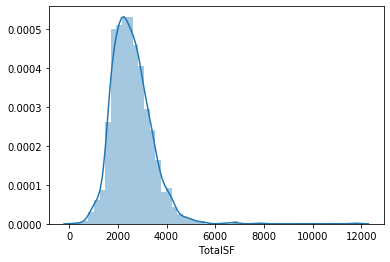

In [15]:
# グラフ
sns.distplot(train['TotalSF'])

train_x: (1451, 81)
train_y: (1451,)
test_x: (1459, 81)
all_data: (2910, 80)


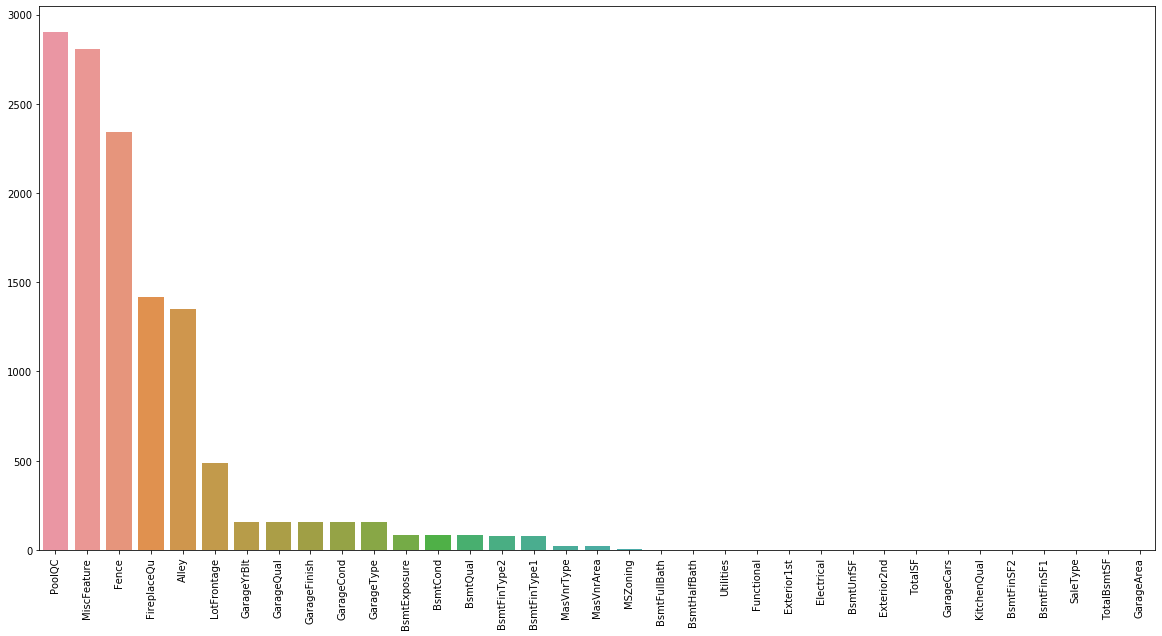

In [0]:
#学習データを目的変数とそれ以外に分ける
train_x = train.drop("SalePrice",axis=1)
train_y = train["SalePrice"]

# ==
# 大枠の流れ
# 価格　:left_right_arrow:　広さ、築年数、素材・完成度
# 各々、散布図、グラフ等で確認する
#  ⇒ 外れ値を除去していく。
# 
# ？変数を分ける（学習データを目的変数とそれ以外に分ける）
# ？学習データとテストデータを統合
# データのサイズを確認
# データの欠損値を確認する
# 
# ==

#学習データとテストデータを統合
all_data = pd.concat([train_x,test_x],axis=0,sort=True)

#IDのカラムは不必要なので別の変数に格納
train_ID = train['Id']
test_ID = test_x['Id']

all_data.drop("Id", axis = 1, inplace = True)

#それぞれのデータのサイズを確認
print("train_x: "+str(train_x.shape))
print("train_y: "+str(train_y.shape))
print("test_x: "+str(test_x.shape))
print("all_data: "+str(all_data.shape))

#データの欠損値を確認する
all_data_na = all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
all_data_na

#欠損値の数をグラフ化
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)

# 欠損値があるカラムをリスト化
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

#欠損があるカラムのデータ型を確認
all_data[na_col_list].dtypes.sort_values()

In [0]:
# 欠損値があるカラムをリスト化
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

#欠損があるカラムのデータ型を確認
all_data[na_col_list].dtypes.sort_values()

GarageArea      float64
TotalBsmtSF     float64
TotalSF         float64
BsmtFinSF1      float64
BsmtFinSF2      float64
GarageYrBlt     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageCars      float64
BsmtUnfSF       float64
MasVnrArea      float64
LotFrontage     float64
GarageType       object
KitchenQual      object
MasVnrType       object
MiscFeature      object
PoolQC           object
SaleType         object
MSZoning         object
GarageQual       object
Alley            object
GarageCond       object
Functional       object
FireplaceQu      object
Fence            object
Exterior2nd      object
Exterior1st      object
Electrical       object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
GarageFinish     object
Utilities        object
dtype: object

In [0]:
#隣接した道路の長さ（LotFrontage）の欠損値の補完
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#欠損値が存在するかつfloat型のリストを作成
float_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist()

#欠損値が存在するかつobject型のリストを作成
obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()

#float型の場合は欠損値を0で置換
all_data[float_list] = all_data[float_list].fillna(0)

#object型の場合は欠損値を"None"で置換
all_data[obj_list] = all_data[obj_list].fillna("None")

#欠損値が全て置換できているか確認
all_data.isnull().sum()[all_data.isnull().sum() > 0]

Series([], dtype: int64)

In [0]:
# カテゴリ変数に変換する
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

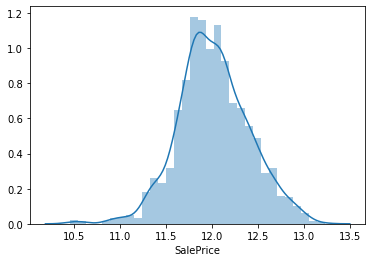

In [0]:
# --
# ■正規分布、SalesPrice

# 以下2同じ。対数取るだけ。
# ｜方法1
#目的変数の対数log(x+1)をとる
train_y = np.log1p(train_y)
#分布を可視化
# plt.figure(figsize=(20, 10))
# sns.distplot(train_y)

# ｜方法2
sns.distplot(np.log(train['SalePrice']))

# log
# 指定された double 値の自然対数値 (底は e) を返します。
# log1p
# 引数と 1 の合計の自然対数を返します。x の値が小さい場合、log1p(x) の結果は、log(1.0+x) の
# 浮動小数点評価よりも ln(1 + x) の真の結果にかなり近くなります。
# --


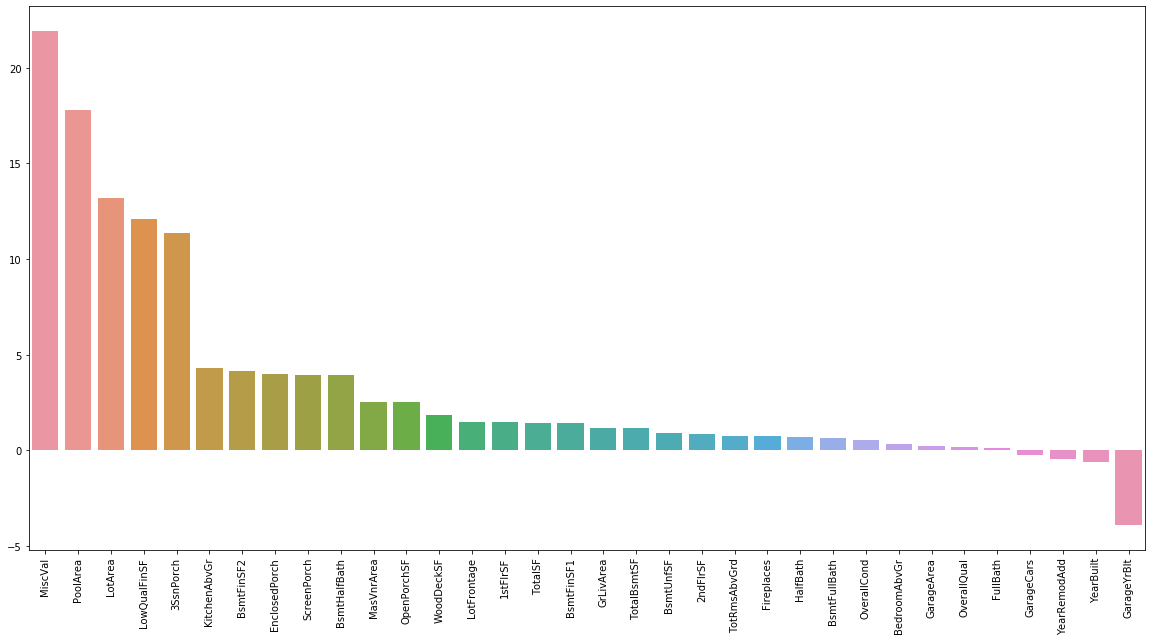

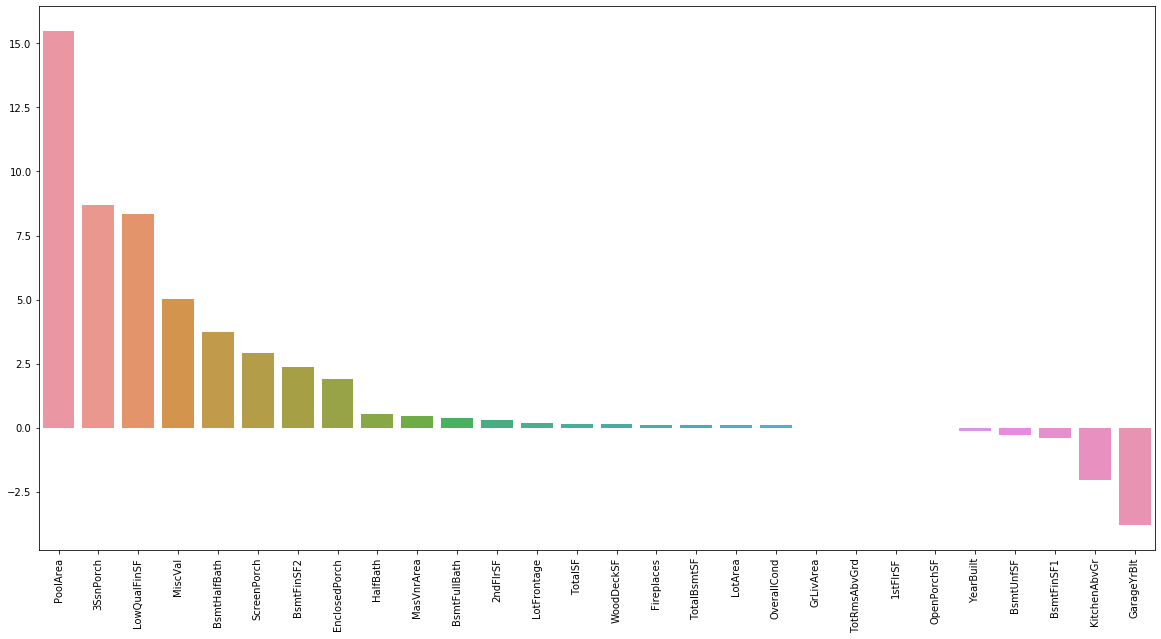

In [0]:
#数値の説明変数のリストを作成
num_feats = all_data.dtypes[all_data.dtypes != "object" ].index
# 目的変数
# ＝　予測したい変数
# 説明変数
# ＝　目的変数を説明する変数

#各説明変数の歪度を計算
skewed_feats = all_data[num_feats].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats.index, y=skewed_feats)
# 歪度の閾値は0.5として、それよりも歪度が大きいものは対数変換することにします。

# # --
# # ■Box-Cox変換
# # ｜プラスのみ。
# #歪度の絶対値が0.5より大きい変数だけに絞る
# skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

# #各変数の最小値を表示
# for i in skewed_feats_over:
#     print(min(all_data[i]))
# # --
# --
#■Yeo-Johnson変換
# ｜マイナスにも可能。
pt = PowerTransformer()
pt.fit(all_data[skewed_feats_over])

#変換後のデータで各列を置換
all_data[skewed_feats_over] = pt.transform(all_data[skewed_feats_over])

#各説明変数の歪度を計算
skewed_feats_fixed = all_data[skewed_feats_over].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats_fixed.index, y=skewed_feats_fixed)
# --


In [0]:
#特徴量に1部屋あたりの面積を追加
all_data["FeetPerRoom"] =  all_data["TotalSF"]/all_data["TotRmsAbvGrd"]

#その他有効そうなものを追加する

#建築した年とリフォームした年の合計
all_data['YearBuiltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

#バスルームの合計面積
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

#縁側の合計面積
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

#プールの有無
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

#2階の有無
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

#ガレージの有無
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#地下室の有無
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#暖炉の有無
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [0]:
# カテゴリ変数は多くのモデルでそのまま分析に用いることができません。
# そのため、カテゴリ変数をエンコーディングしていきます。
#各カラムのデータ型を確認
all_data.dtypes.value_counts()

#カテゴリ変数となっているカラムを取り出す
cal_list = all_data.dtypes[all_data.dtypes=="object"].index.tolist()

#学習データにおけるカテゴリ変数のデータ数を確認
train_x[cal_list].info()

# 学習データの中に数が0となっているカテゴリ変数はないようですのでそのまま進めていきます。

# --
# one-hot-encoding
# 各カテゴリ変数を（0,1）の二値変数をそれぞれ作成します。これらの二値変数は「ダミー変数」と呼ばれます。
#カテゴリ変数をget_dummiesによるone-hot-encodingを行う
all_data = pd.get_dummies(all_data,columns=cal_list)

#サイズを確認
all_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 46 columns):
Alley            1451 non-null int64
BldgType         1451 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1413 non-null object
BsmtFinType1     1414 non-null object
BsmtFinType2     1413 non-null object
BsmtQual         1414 non-null object
CentralAir       1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
Electrical       1450 non-null object
ExterCond        1451 non-null object
ExterQual        1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
Fence            280 non-null object
FireplaceQu      761 non-null object
Foundation       1451 non-null object
Functional       1451 non-null object
GarageCond       1370 non-null object
GarageFinish     1370 non-null object
GarageQual       1370 non-null object
GarageType       1370 non-null object
Heating          1451 

(2910, 353)

train_x: (347, 353)
test_x: (2563, 353)
[0]	eval-rmse:0.249216	train-rmse:0.249209
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 1000 rounds.
[1]	eval-rmse:0.246734	train-rmse:0.246728
[2]	eval-rmse:0.244277	train-rmse:0.24427
[3]	eval-rmse:0.241844	train-rmse:0.241838
[4]	eval-rmse:0.239436	train-rmse:0.239429
[5]	eval-rmse:0.237051	train-rmse:0.237045
[6]	eval-rmse:0.234691	train-rmse:0.234684
[7]	eval-rmse:0.232353	train-rmse:0.232347
[8]	eval-rmse:0.230039	train-rmse:0.230033
[9]	eval-rmse:0.227749	train-rmse:0.227742
[10]	eval-rmse:0.225481	train-rmse:0.225474
[11]	eval-rmse:0.223235	train-rmse:0.223229
[12]	eval-rmse:0.221012	train-rmse:0.221006
[13]	eval-rmse:0.218811	train-rmse:0.218805
[14]	eval-rmse:0.216632	train-rmse:0.216626
[15]	eval-rmse:0.214475	train-rmse:0.214468
[16]	eval-rmse:0.212339	train-rmse:0.212333
[17]	eval-rmse:0.210224	train-rmse:0.210218
[18]	eval-rmse:0.208131	train-rm

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22]	eval-rmse:0.199963	train-rmse:0.199957
[23]	eval-rmse:0.197972	train-rmse:0.197966
[24]	eval-rmse:0.196	train-rmse:0.195994
[25]	eval-rmse:0.194048	train-rmse:0.194042
[26]	eval-rmse:0.192116	train-rmse:0.19211
[27]	eval-rmse:0.190203	train-rmse:0.190197
[28]	eval-rmse:0.188309	train-rmse:0.188302
[29]	eval-rmse:0.186433	train-rmse:0.186427
[30]	eval-rmse:0.184577	train-rmse:0.184571
[31]	eval-rmse:0.182739	train-rmse:0.182732
[32]	eval-rmse:0.180919	train-rmse:0.180913
[33]	eval-rmse:0.179117	train-rmse:0.179111
[34]	eval-rmse:0.177333	train-rmse:0.177327
[35]	eval-rmse:0.175568	train-rmse:0.175561
[36]	eval-rmse:0.173819	train-rmse:0.173813
[37]	eval-rmse:0.172088	train-rmse:0.172082
[38]	eval-rmse:0.170374	train-rmse:0.170368
[39]	eval-rmse:0.168678	train-rmse:0.168672
[40]	eval-rmse:0.166998	train-rmse:0.166992
[41]	eval-rmse:0.165335	train-rmse:0.165329
[42]	eval-rmse:0.163688	train-rmse:0.163682
[43]	eval-rmse:0.162058	train-rmse:0.162052
[44]	eval-rmse:0.160445	train-rmse:0

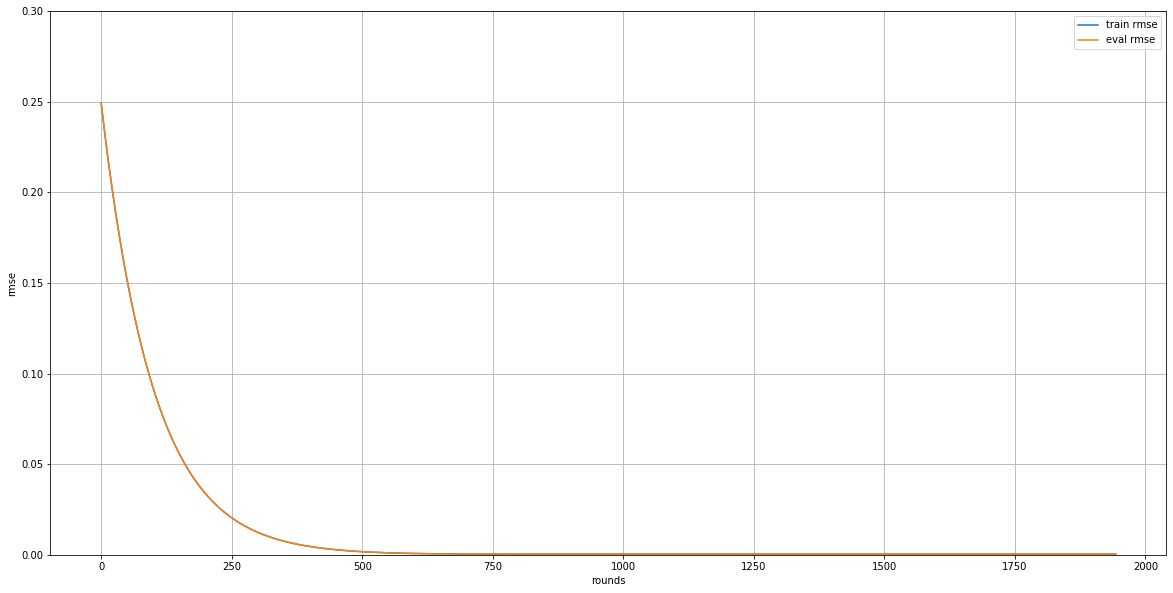

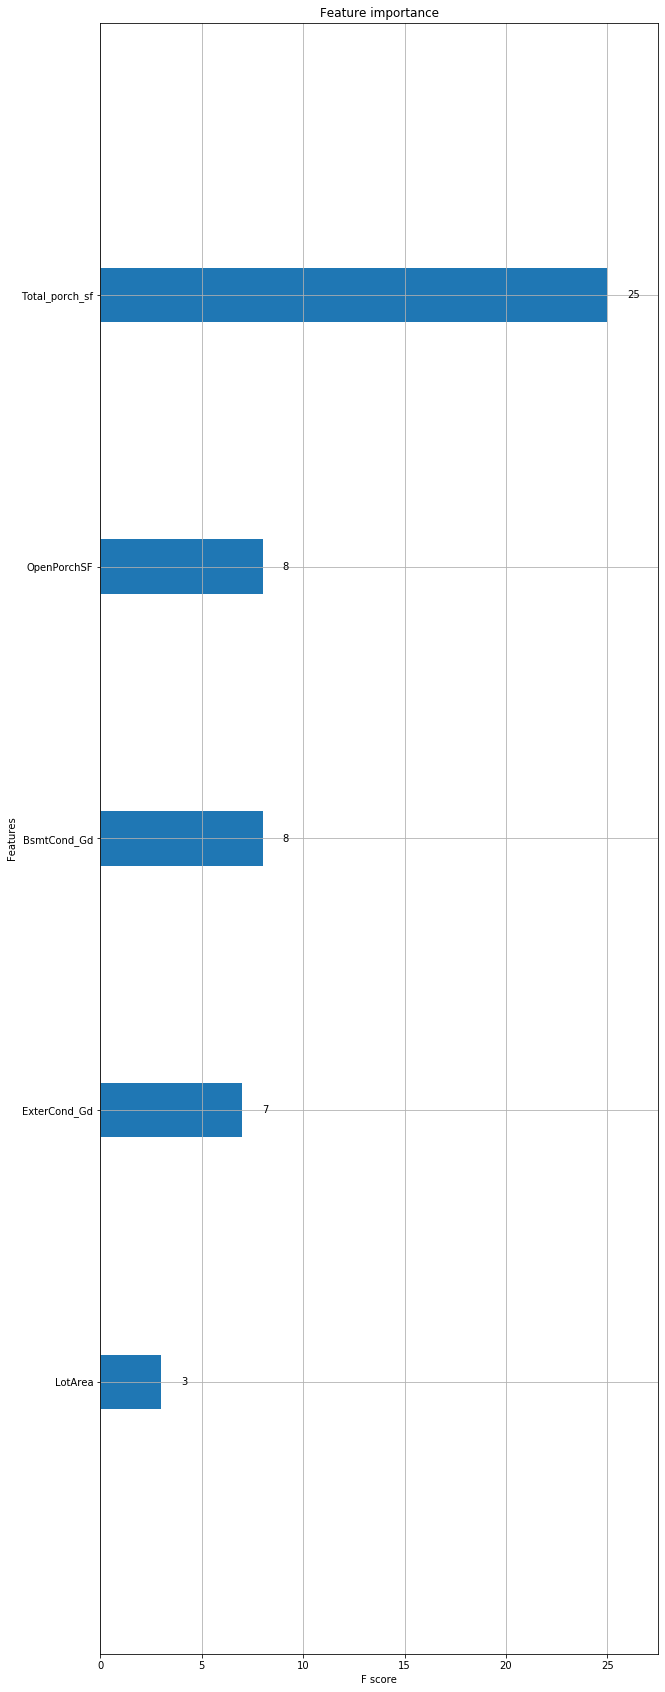

In [0]:
#学習データとテストデータに再分割
train_x = all_data.iloc[:train_x.shape[0],:].reset_index(drop=True)
test_x = all_data.iloc[train_x.shape[0]:,:].reset_index(drop=True)

#サイズを確認
print("train_x: "+str(train_x.shape))
print("test_x: "+str(test_x.shape))

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# データの分割
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

# --
# ■GBDT（勾配ブースティング木）によるモデル作成
#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
            'max_depth': 3,
            'eta': 0.01,
            'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
  param, dtrain,
  num_round,
  evallist,
  evals_result=evals_result,
  # 一定ラウンド回しても改善が見込めない場合は学習を打ち切る
  early_stopping_rounds=1000
)
# 学習曲線を可視化する
plt.figure(figsize=(20, 10))
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.ylim(0, 0.3)
plt.show()

#特徴量ごとの重要度を可視化する
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 30)

# # あとはファイル作成
# import csv
# with open("predict_result_data_house.csv", "w") as f:
#   dtest = xgb.DMatrix(test_x)
#   my_submission = pd.DataFrame()
#   my_submission["Id"] = test_ID
#   my_submission["SalePrice"] = np.exp(bst.predict(dtest))
  
#   writer = csv.writer(f, lineterminator='\n')
#   # writer.writerow(["Id", "SalePrice"])
#   writer.writerow(["Id", "SalePrice"])  
#   for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
#       writer.writerow([pid, survived])

# print('done');

In [0]:
# あとはファイル作成
import csv
with open("predict_result_data_house.csv", "w") as f:
  # dtest = xgb.DMatrix(test_x)
  # my_submission = pd.DataFrame()
  # my_submission["Id"] = test_ID
  # my_submission["SalePrice"] = np.exp(bst.predict(dtest))
  
  writer = csv.writer(f, lineterminator='\n')
  # writer.writerow(["Id", "SalePrice"])
  writer.writerow(["Id", "SalePrice"])  
  for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
      writer.writerow([pid, survived])

print('done');

NameError: ignored